In [218]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, ensemble, tree
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import confusion_matrix, auc,roc_auc_score,roc_curve,recall_score,classification_report
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)

## IMPORTING DATA

In [219]:
# Function to Load the file at specified path
# Parameters :- 1. path :- path from where file should be I

def Load_File(path) :
    if os.path.isfile(path) :
        data = pd.read_csv(path)
        data = data.replace('?', np.nan)
        print("\n" + "Number of rows in data are %s" % len(data))
        print("Number of columns in data are %s" % len(data.columns) + "\n")
        print("Following are the data types of columns:- ")
        print(data.dtypes)
        print("Number of missing values in the data are:- ")
        print(data.isnull().sum())
        print("Data Import is Complete")
        
        return data
    else:
        print(path + " does not exist. Enter the correct path")
        

# Generalized Function to plot the counts
# Parameters
# 1. rotx  : rotation of ticks on x-axis
# 2. roty  : rotation of ticks on y-axis
# 3. fontx : font size of ticks on x-axis
# 4. fonty : font size of ticks on y-axis
# 5. column_name : Name of the column for which we need the count
# 6. data_name   : Dataframe Used for plotting
# 7. plot_size   : Size of the plot
# 8. hue : If second column is needed for getting the count, the hue is True else False
# 9. hue_column_name = Second Column for plotting


def countplot(rotx, roty, fontx, fonty, column_name, data_name, plot_size = (10, 5), hue = False, hue_column_name=None):
    plt.figure(figsize = plot_size)
    plt.xticks(rotation=rotx, fontsize=fontx)
    plt.yticks(rotation=roty, fontsize=fonty)
    sns.set_style("whitegrid")
    if not hue:
        sns.countplot(column_name, data=data_name, palette='husl',
                      order = data_name[column_name].value_counts().index)
    else:
        sns.countplot(column_name, data=data_name, 
                      palette='husl', hue = hue_column_name,
                      order = data_name[column_name].value_counts().index)
    sns.despine()


# Function to Encode the Categorical Data Columns
# Parameters 1. df :- Dataframe 2. Column_name :- Feature to encode

def categorical_encoding(df, column_name_list=[]):
    
    for column_name in column_name_list:
        print(df[column_name].unique())
        categorical_columns = pd.get_dummies(df[column_name], prefix = column_name, 
                                             prefix_sep = '_', drop_first = False)
        df = pd.concat([df, categorical_columns], axis = 1)
        df = df.drop(column_name, axis = 1)
    return df


# Function to Label Encode the data
# Parameters :- 1. data :- Dataframe 2. columns_list :- List of columns to label encode

def labelEncoder(data, columns_list):
    for col in columns_list:
        encoder = LabelEncoder()
        data[col]  = encoder.fit_transform(data[col])
    return data


# Function to plot stacked plot
# Paramteres :- 
# data :- Dataframe used for plotting
# column_one :- Column One to group by
# column_two : Column Two to group by
# agg_column : Column to count numbers

def stacked_plot(data, column_one, column_two, agg_column, plot_size=(10, 5)):
    pal     = sns.color_palette("colorblind")
    grouped = data.groupby([column_one, column_two])[agg_column].count()
    grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    grouped = grouped.unstack(column_two).fillna(0)
    print(grouped)
    unique_list = list(data[column_two].unique())
    grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=plot_size)

### Assessment

In [220]:
oulad_assessment = pd.read_csv('assessments.csv')
oulad_assessment

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [221]:
oulad_assessment.shape

(206, 6)

In [222]:
oulad_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [223]:
oulad_assessment.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [224]:
oulad_assessment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [225]:
oulad_assessment['date'] = oulad_assessment['date'].fillna(int(oulad_assessment['date'].astype(float).mean()))

In [226]:
oulad_assessment['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [227]:
oulad_assessment['assessment_type'].unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

(array([29., 25., 22., 34., 20., 32., 44.]),
 array([ 12.        ,  47.57142857,  83.14285714, 118.71428571,
        154.28571429, 189.85714286, 225.42857143, 261.        ]),
 <BarContainer object of 7 artists>)

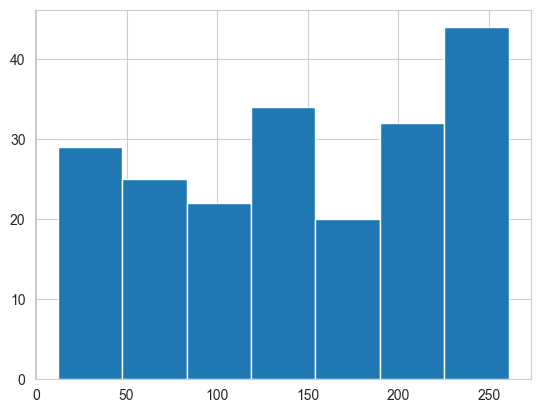

In [228]:
plt.hist(oulad_assessment['date'].astype(int), bins=7)

### Courses

In [229]:
oulad_courses = pd.read_csv('courses.csv')

In [230]:
oulad_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


### Student Assesment

In [231]:
oulad_student_assessment = pd.read_csv('studentAssessment.csv')

In [232]:
oulad_student_assessment.shape

(173912, 5)

In [233]:
oulad_student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [234]:
oulad_student_assessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [235]:
oulad_student_assessment.dropna(inplace=True)

In [236]:
oulad_student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


### Student Registration

In [237]:
oulad_student_registration = pd.read_csv('studentRegistration.csv')

In [238]:
oulad_student_registration.shape

(32593, 5)

In [239]:
oulad_student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [240]:
oulad_student_registration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [241]:
oulad_student_registration['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in oulad_student_registration['date_unregistration']]
oulad_student_registration['date_registration']   = oulad_student_registration['date_registration'].fillna(0).astype(float).apply(abs)

In [242]:
oulad_student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,159.0,0
1,AAA,2013J,28400,53.0,0
2,AAA,2013J,30268,92.0,1
3,AAA,2013J,31604,52.0,0
4,AAA,2013J,32885,176.0,0


### Student Information

In [243]:
oulad_student_info = pd.read_csv('studentInfo.csv')

In [244]:
oulad_student_registration.shape

(32593, 5)

In [245]:
oulad_student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [246]:
oulad_student_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [247]:
print(oulad_student_info['imd_band'].unique())

oulad_student_info['imd_band'] = oulad_student_info['imd_band'].fillna(oulad_student_info['imd_band'].mode()[0])

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']


In [248]:
oulad_student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


### Studen vlr

In [249]:
oulad_studen_vle = pd.read_csv('studentVle.csv')

In [250]:
oulad_studen_vle.shape

(10655280, 6)

In [251]:
oulad_studen_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [252]:
oulad_studen_vle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [253]:
oulad_studen_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


### vle

In [254]:
oulad_vle = pd.read_csv('vle.csv')

In [255]:
oulad_vle.shape

(6364, 6)

In [256]:
oulad_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [257]:
oulad_vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [258]:
oulad_vle = oulad_vle.drop(['week_from', 'week_to'], axis = 1)

In [259]:
oulad_vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


## MERGING DATA

##### In the first step I am merging studentVle table with the vle table. This can show us about the interactions of students with VLE

In [260]:
student_vle_merge_vle = oulad_studen_vle.merge(oulad_vle, 
                                                on=['id_site', 'code_module', 'code_presentation'],
                                                how = 'left')

In [261]:
## We can see that there are multiple interactions from a single student even before the course started. We can assume
## that if student is interested in the course then that student will interact with the material of course before the
## course starts

## Number of clicks before the course can be an importtant factor which can help us determine whether student will
## perform good or bad in the course. Therefore for each student we will calculate the number of clicks before and
## after course went live

student_vle_merge_vle[(student_vle_merge_vle['id_student']==28400) & (student_vle_merge_vle['date']<0)].head(10)

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent
5,AAA,2013J,28400,546652,-10,8,forumng
6,AAA,2013J,28400,546876,-10,2,subpage
7,AAA,2013J,28400,546688,-10,15,oucontent
8,AAA,2013J,28400,546662,-10,17,oucontent
9,AAA,2013J,28400,546890,-10,1,url


In [262]:
student_vle_merge_vle['Click_Timing'] = ['Before' if date < 0 else 'After' for date in student_vle_merge_vle['date']]

In [263]:
# Creating After clicks and Before Clicks columns based on the data

student_vle_merge_vle['After_Clicks'] = np.where(student_vle_merge_vle['Click_Timing'] =='After',
                                                 student_vle_merge_vle['sum_click'], 0)

student_vle_merge_vle['Before_Clicks']= np.where(student_vle_merge_vle['Click_Timing'] =='Before',
                                                 student_vle_merge_vle['sum_click'], 0)

In [264]:
student_vle_merge_vle_group = student_vle_merge_vle.groupby(['code_module',
                                                             'code_presentation',
                                                             'id_student']
                                                            ,as_index=False)[['sum_click', 'After_Clicks', 'Before_Clicks']].sum()

In [265]:
student_vle_merge_vle_group.isnull().sum()

code_module          0
code_presentation    0
id_student           0
sum_click            0
After_Clicks         0
Before_Clicks        0
dtype: int64

In [266]:
### Plot describing the way students connect to VLE
### We can see that most of the rows in the data are on ForumNG (Open University Forum Platform),
### oucontent (Open University Content), subpage and homepage.
plt.figure(figsize=(20, 5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Axes: xlabel='activity_type', ylabel='count'>

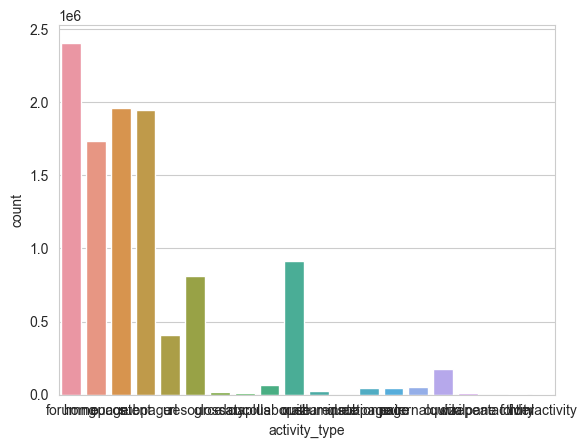

In [267]:
sns.countplot(x='activity_type', data=student_vle_merge_vle)

<Axes: xlabel='activity_type'>

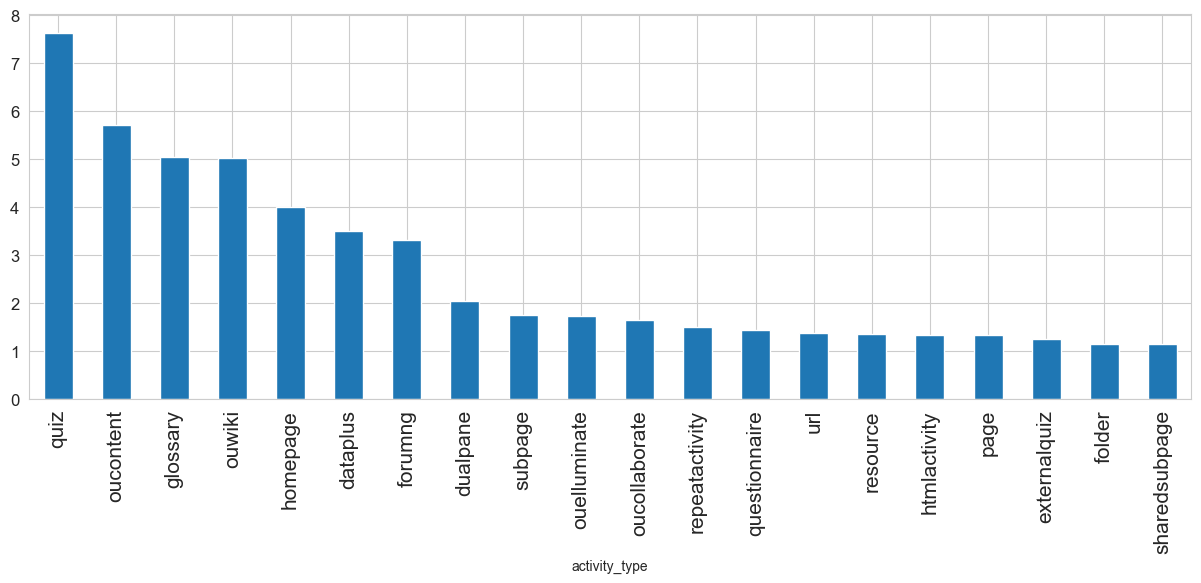

In [268]:
# In this step I am plotting average interaction of student with each activity type. 
# We can see that most of the interactions are with the QUIZ, OUCONTENT, GLOSSARY, OUWIKI which is understandable as 
# student interact mostly with content to learn stuff and then use glossary to understand the study material. Also,
# interactions with quiz is evident as after learning something, there are quizzes on the platform after completing chapters.

plt.figure(figsize = (15, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_vle_merge_vle.groupby(['activity_type'], as_index=True)['sum_click'].mean().sort_values(ascending=False).plot(kind='bar')

In [269]:
student_vle_merge_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,Click_Timing,After_Clicks,Before_Clicks
0,AAA,2013J,28400,546652,-10,4,forumng,Before,0,4
1,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
2,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
3,AAA,2013J,28400,546614,-10,11,homepage,Before,0,11
4,AAA,2013J,28400,546714,-10,1,oucontent,Before,0,1


##### In this step I will merge studentRegistration table with the courses table to understand the related between registrations and length of course

In [270]:
student_registration_merge_courses = oulad_student_registration.merge(oulad_courses, 
                                                                      on = ['code_module', 'code_presentation'],
                                                                      how = 'left')

In [271]:
student_registration_merge_courses['Year'] = student_registration_merge_courses['code_presentation'].str[0:4]
student_registration_merge_courses['Starting_Month'] = ['February' if code[-1] == 'B' else 'October' 
                                                        for code in student_registration_merge_courses['code_presentation']]

In [272]:
student_registration_merge_courses

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,Year,Starting_Month
0,AAA,2013J,11391,159.0,0,268,2013,October
1,AAA,2013J,28400,53.0,0,268,2013,October
2,AAA,2013J,30268,92.0,1,268,2013,October
3,AAA,2013J,31604,52.0,0,268,2013,October
4,AAA,2013J,32885,176.0,0,268,2013,October
...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,4.0,0,269,2014,October
32589,GGG,2014J,2645731,23.0,0,269,2014,October
32590,GGG,2014J,2648187,129.0,0,269,2014,October
32591,GGG,2014J,2679821,49.0,1,269,2014,October


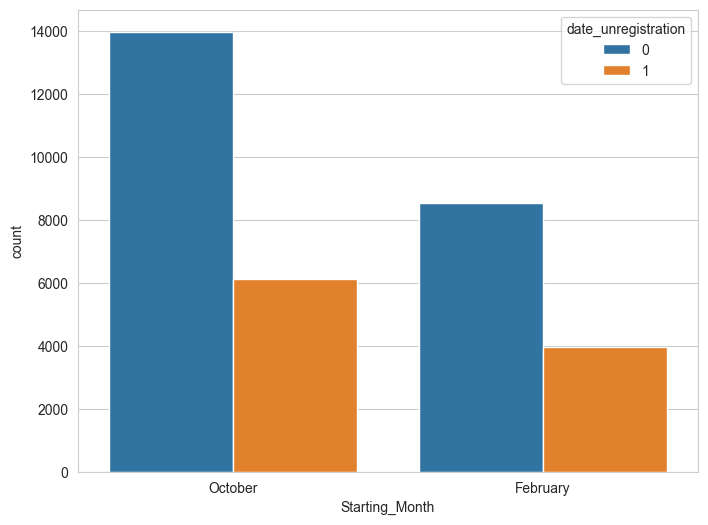

In [273]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Starting_Month', data=student_registration_merge_courses, hue='date_unregistration')
plt.show()

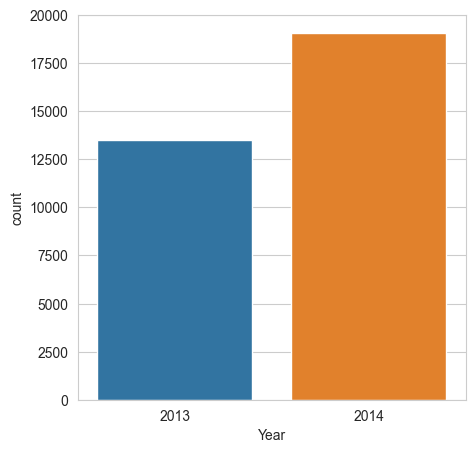

In [274]:
### This plot shows us that there are more registrations in 2014 as compared to 2013

plt.figure(figsize=(5, 5))
sns.countplot(x='Year', data=student_registration_merge_courses)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

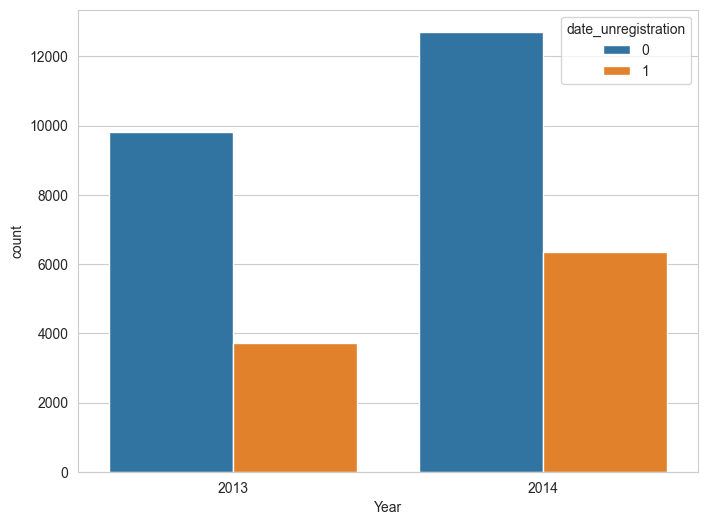

In [275]:
# This plot shows us the count by year and then by data unregistration count

plt.figure(figsize=(8,6))
sns.countplot(x= 'Year', data = student_registration_merge_courses, hue='date_unregistration')
plt.show

In [276]:
### From the below table we can see that course length doesn't have much difference for the student who withdrawn
### and students who completed the course

student_registration_merge_courses.groupby('date_unregistration', as_index=False)['module_presentation_length'].mean()

,date_unregistration,module_presentation_length
0,0,256.095378
1,1,255.819500


##### in this step I will merge assessments Table with the studentAssessment Table to understand the relationship between assessment and student performance

In [277]:
student_assessment_merge_assessment = oulad_student_assessment.merge(oulad_assessment,
                                                                     on = ['id_assessment'], how='left' )

In [278]:
student_assessment_merge_assessment.dtypes

id_assessment          int64
id_student             int64
date_submitted         int64
is_banked              int64
score                float64
code_module           object
code_presentation     object
assessment_type       object
date                 float64
weight               float64
dtype: object

In [279]:
# There would have been instances where students submitted their assignments later than the deadline. In this step,
# using the date_submitted (days after student recieved their assignment) column and date (deadline in days for the assignment)
# we can check whether their was a late submission or not (0 : Late, 1:OnTime)

student_assessment_merge_assessment['Late_submission'] = ['0' if int(student_assessment_merge_assessment['date_submitted'].iloc[i]) 
                                                          > int(student_assessment_merge_assessment['date'].iloc[i]) else '1' 
                                                         for i in range(len(student_assessment_merge_assessment))]

In [280]:
print('Percentage of Late Submissions From Students are : ')
print((len(student_assessment_merge_assessment[student_assessment_merge_assessment['Late_submission']=='0'])/len(student_assessment_merge_assessment)*100))
print('We can see that approximately 30 percent of students submitted their assigments late')

Percentage of Late Submissions From Students are : 
29.958155624240963
We can see that approximately 30 percent of students submitted their assigments late


Late_submission                          0          1
assessment_type assessment_type                      
CMA             CMA              46.777830  53.222170
Exam            Exam             57.914902  42.085098
TMA             TMA              16.473797  83.526203


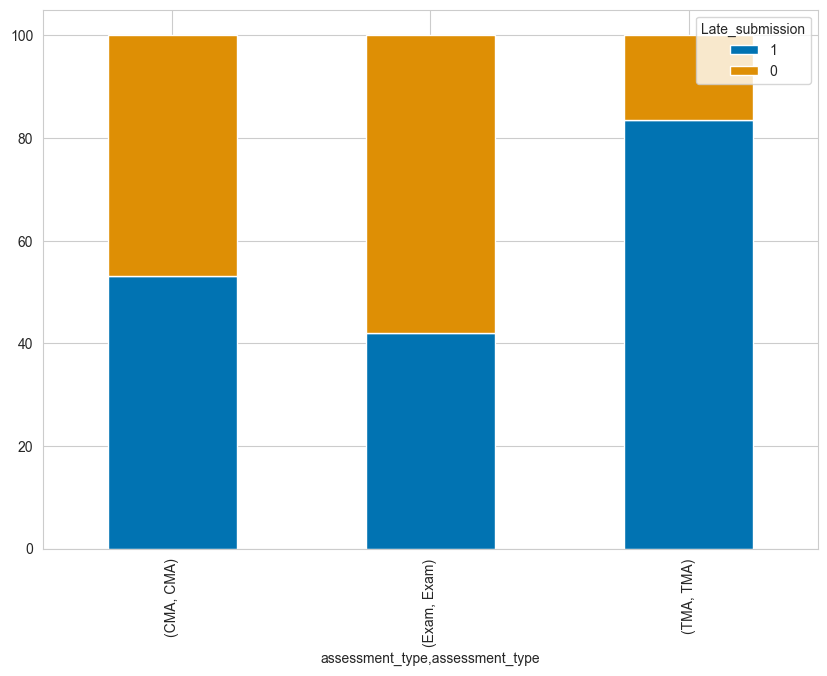

In [281]:
# There are three types of assessments :- Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA), Exams
# Following Plot Shows us the Percentage of Late Submission by Assessment_Type
# We can see that Most of the late submissions are for Final Exam and CMA which is Computer marked exam.
# Tutor marked exams has the least late submissions

stacked_plot(student_assessment_merge_assessment, 'assessment_type', 'Late_submission', 'id_student', plot_size=(10, 7))

Late_submission                  0          1
code_module code_module                      
AAA         AAA          25.810553  74.189447
BBB         BBB          47.472021  52.527979
CCC         CCC          69.063342  30.936658
DDD         DDD          30.566283  69.433717
EEE         EEE          14.544763  85.455237
FFF         FFF          10.345268  89.654732
GGG         GGG          10.049293  89.950707


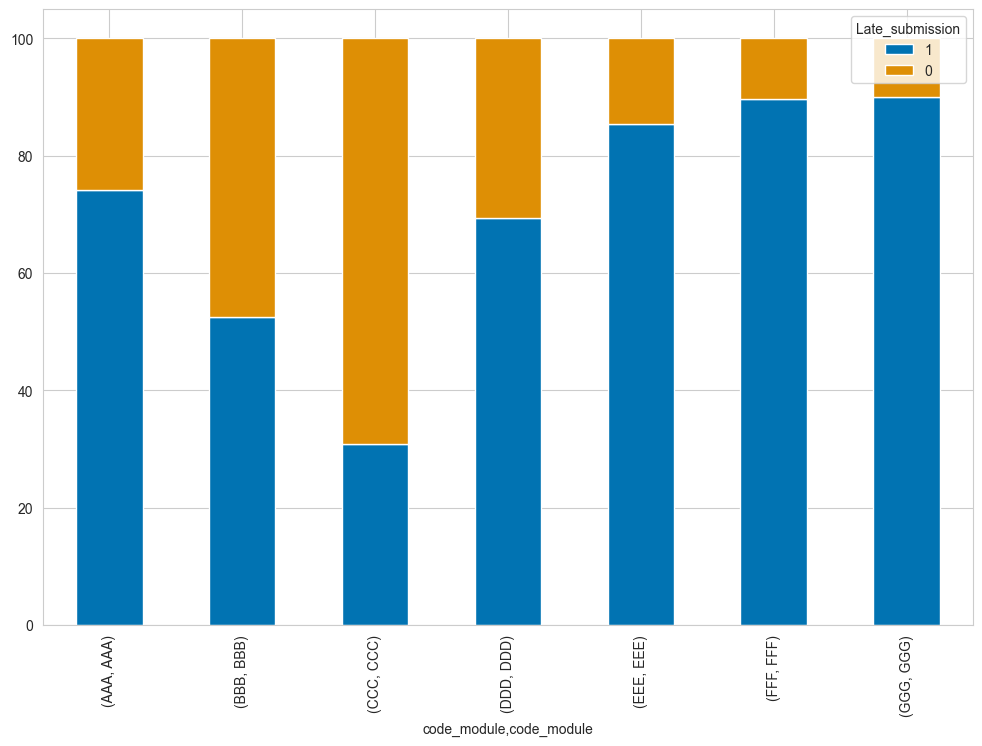

In [282]:
# There are 7 course modules. 4 are from STEM and 3 from Social Sciences
# Social Sciences :- AAA, BBB, GGG
# STEM :- CCC, DDD, EEE, FFF
# We can see from the plot that most percentage of the late submissions are for Course BBB, CCC and DDD


stacked_plot(student_assessment_merge_assessment, 'code_module', 'Late_submission', 'id_student', plot_size=(12, 8))

In [283]:
## Creating a column for Social Science and STEM field

student_assessment_merge_assessment['Code_Category'] = ['Social_Science' if student_assessment_merge_assessment['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                                        else 'STEM' for i in range(len(student_assessment_merge_assessment))]

Late_submission                        0          1
Code_Category  Code_Category                       
STEM           STEM            26.072296  73.927704
Social_Science Social_Science  37.078578  62.921422


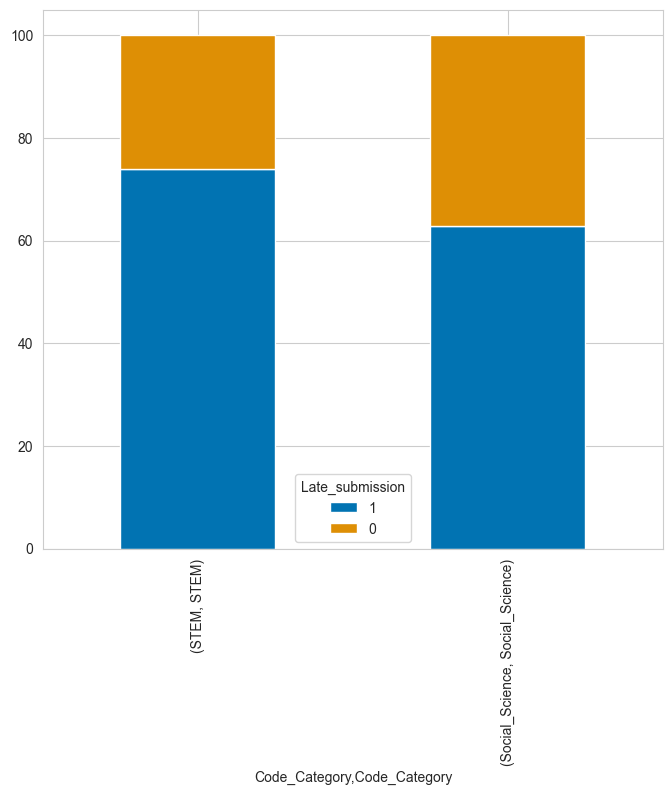

In [284]:
## Social Science has more percentage of late submissions as compared to STEM


stacked_plot(student_assessment_merge_assessment, 'Code_Category', 'Late_submission', 'id_student', plot_size=(8, 7))

In [285]:
# As from the description of table we know that score less than 40 is considered as Fail and above that is pass


student_assessment_merge_assessment['Result'] = ['Fail' if int(student_assessment_merge_assessment['score'].iloc[i]) < 40
                                                        else 'Pass' for i in range(len(student_assessment_merge_assessment))]

Result                             Fail       Pass
Code_Category  Code_Category                      
STEM           STEM            5.132608  94.867392
Social_Science Social_Science  2.949136  97.050864


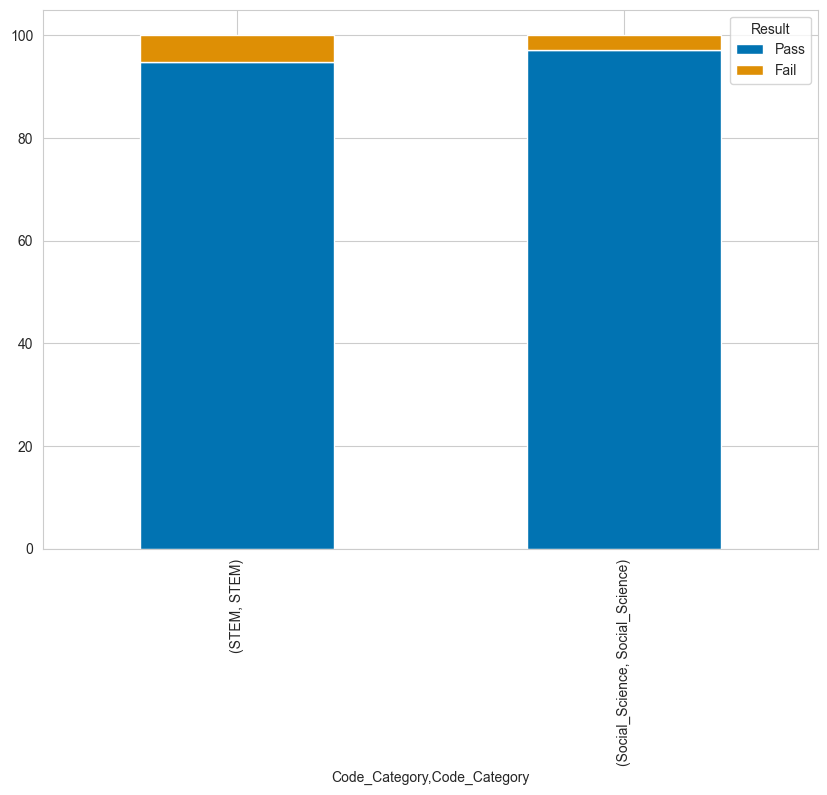

In [286]:
# Following Plot shows us the Ratio of Pass and Fail students in the form of plot
# Failure Rate in STEM is more as compared to Social Sciences

stacked_plot(student_assessment_merge_assessment, 'Code_Category', 'Result', 'id_student', plot_size=(10, 7))

Result                       Fail       Pass
code_module code_module                     
AAA         AAA          2.860776  97.139224
BBB         BBB          3.306266  96.693734
CCC         CCC          9.297903  90.702097
DDD         DDD          9.044297  90.955703
EEE         EEE          1.775298  98.224702
FFF         FFF          1.975570  98.024430
GGG         GGG          1.958593  98.041407


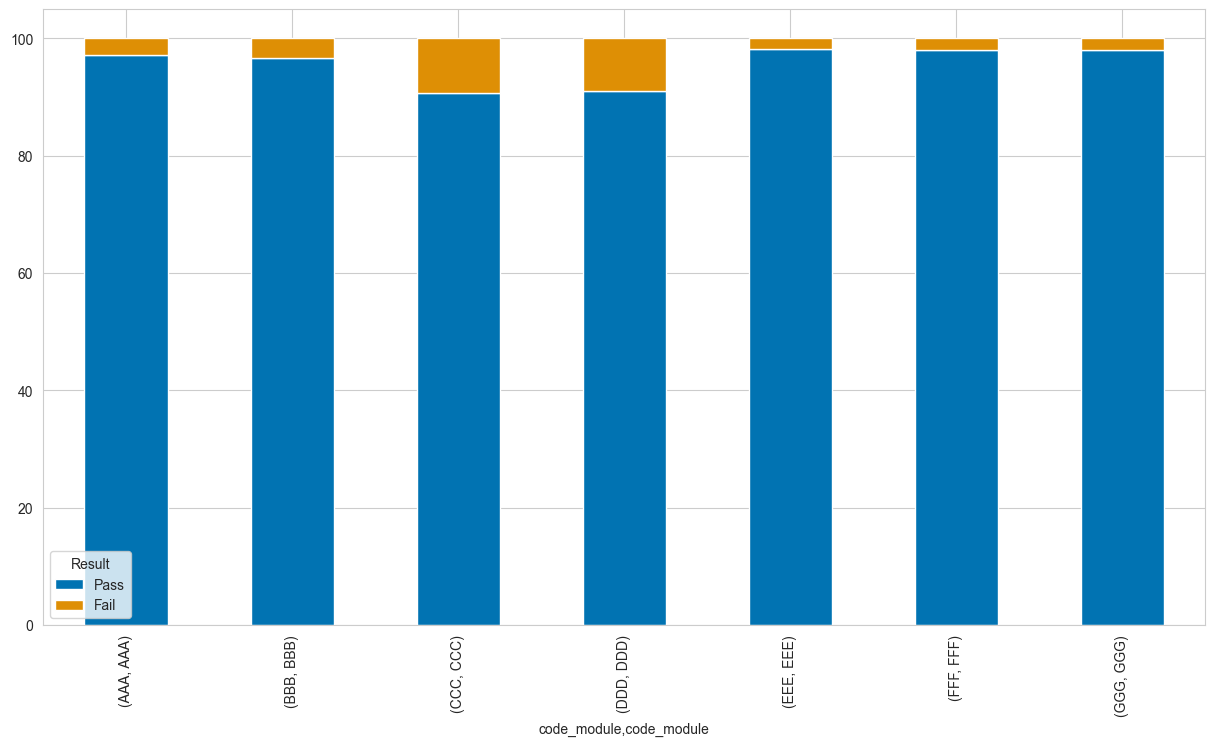

In [287]:
# We can see from the following plot that course DDD , CCC and BBB have the most failure rate. Out of the 3
# courses 2 of them are from STEM.


stacked_plot(student_assessment_merge_assessment, 'code_module', 'Result', 'id_student', plot_size=(15, 8))

In [288]:
## Weightage of Assignment can have impact on the submissions and Result of students. I categorized the weight into
## Low, Medium and High Weightage.

print(student_assessment_merge_assessment['weight'].unique())

percentage_segment = []

for percent in student_assessment_merge_assessment['weight']:
    if percent <= 10:
        percentage_segment.append('Low_Weightage')
    elif percent > 10 and percent <= 30:
        percentage_segment.append('Medium_Weightage')
    else:
        percentage_segment.append('High_Weightage')
        
student_assessment_merge_assessment['Weigthage'] = percentage_segment

[ 10.   20.   30.    5.   18.    1.    0.   35.    9.   22.    2.    7.
   8.  100.    7.5  12.5  15.    3.    4.    6.   17.5  25.   16.   28. ]


Result                                 Fail       Pass
Weigthage        Weigthage                            
High_Weightage   High_Weightage    8.463783  91.536217
Low_Weightage    Low_Weightage     3.329021  96.670979
Medium_Weightage Medium_Weightage  5.307333  94.692667


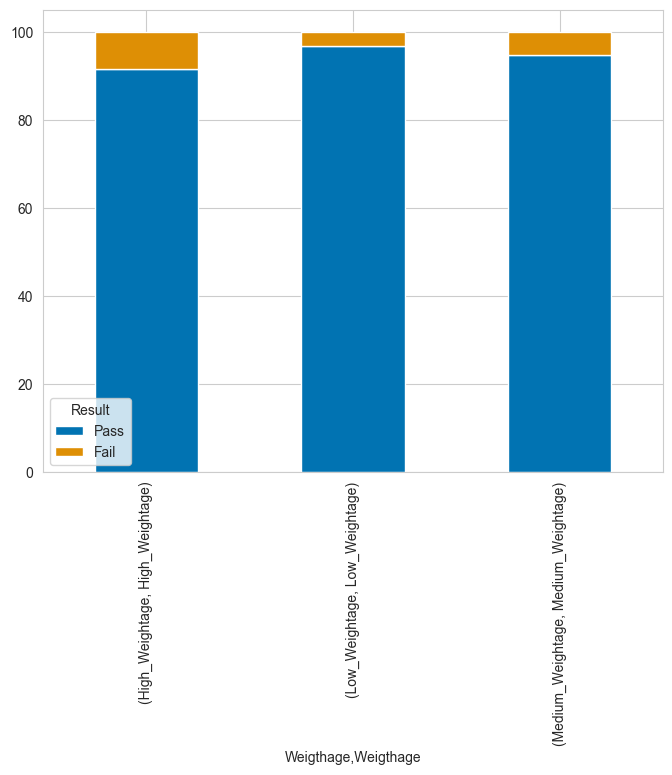

In [289]:
# We can see that Medium and High Weightage Assessments have high failure rate as compared to low

stacked_plot(student_assessment_merge_assessment, 'Weigthage', 'Result', 'id_student', plot_size=(8, 6))

Result                               Fail       Pass
Late_submission Late_submission                     
0               0                6.841630  93.158370
1               1                3.301011  96.698989


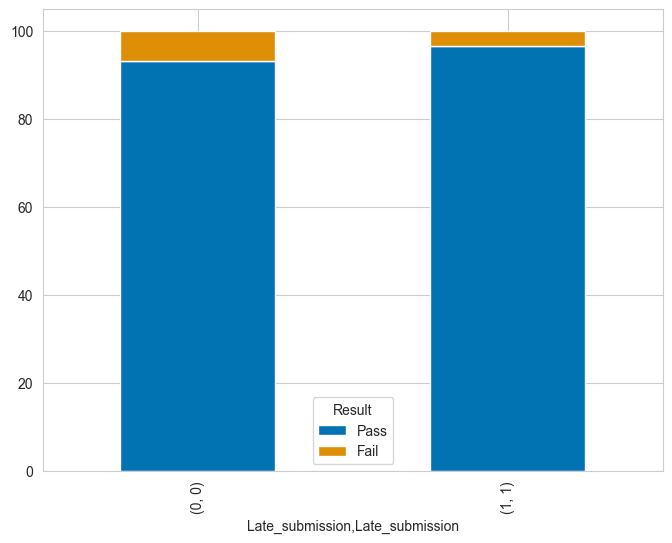

In [290]:
# Following Plot shows the ratio of Pass and Fail in Late_submission.
# We can clearly see that Late Submissions have more Failure Rate as compared to people who submit on time.

stacked_plot(student_assessment_merge_assessment, 'Late_submission', 'Result', 'id_student', plot_size=(8, 6))

In [291]:
student_assessment_merge_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,Late_submission,Code_Category,Result,Weigthage
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,1,Social_Science,Pass,Low_Weightage
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,0,Social_Science,Pass,Low_Weightage
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,1,Social_Science,Pass,Low_Weightage
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,0,Social_Science,Pass,Low_Weightage
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,1,Social_Science,Pass,Low_Weightage


##### MERGING VLE DATA WITH THE STUDENT INFO DATA

In [292]:
student_info = oulad_student_info.merge(student_vle_merge_vle_group, 
                                        on = ['code_module', 'code_presentation', 'id_student'],
                                        how = 'left')

student_info['sum_click']     = student_info['sum_click'].fillna(student_info['sum_click'].mean())
student_info['After_Clicks']  = student_info['After_Clicks'].fillna(student_info['After_Clicks'].mean())
student_info['Before_Clicks'] = student_info['Before_Clicks'].fillna(student_info['Before_Clicks'].mean())

<Axes: xlabel='final_result'>

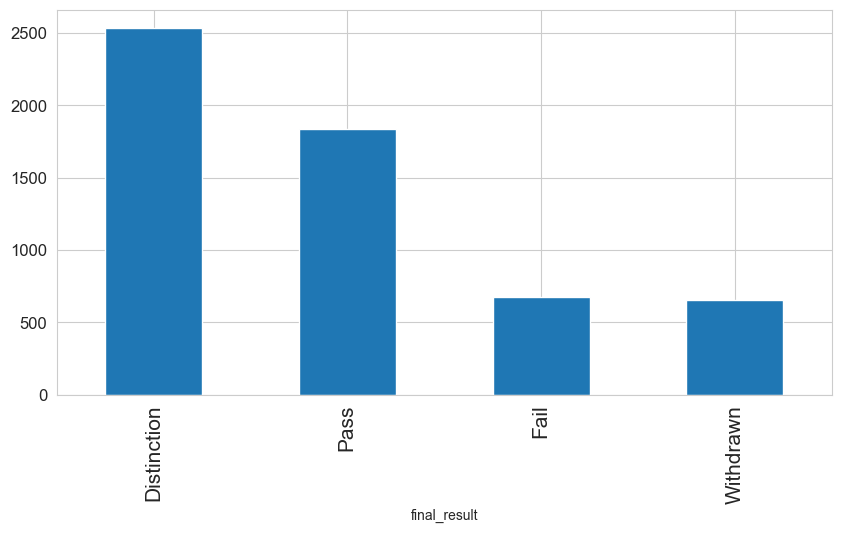

In [293]:
## In this plot I am trying to examine the relationship between number of clicks versus the result
## We can clearly see from the plot that number of clicks is directly related to the result. Student who passed with
## Distinction has significantly more clicks as compared to ones with result = PASS and there is a huge difference
## between the students who failed or withdrawn as compared to the one's who passed with or without distinction

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['After_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='final_result'>

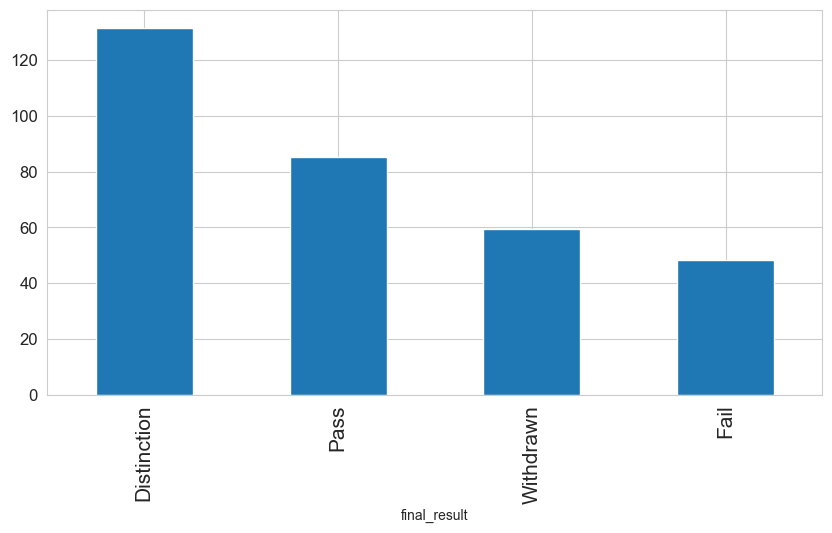

In [294]:
## Even from the clicks data before the course even started, we can see that more the clicks more are the chances
## for student to pass.

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['Before_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='final_result'>

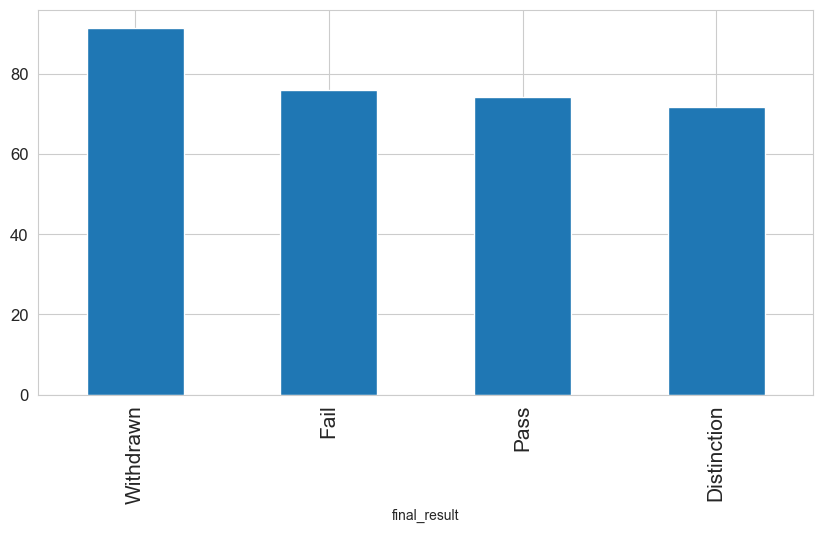

In [295]:
## People with less credits have more chances to pass with distinction or pass because they have to study less
## People who withdrew has more average credits as compared to another. 

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['studied_credits'].mean().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='age_band'>

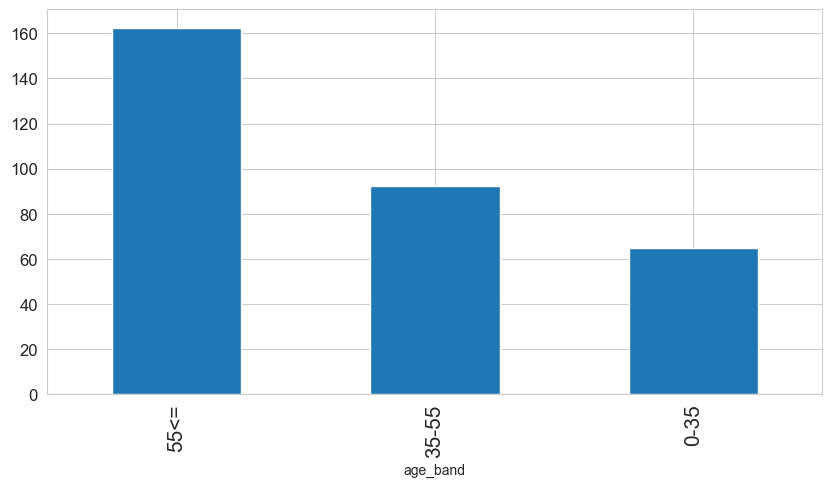

In [296]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['age_band'])['Before_Clicks'].mean().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='imd_band'>

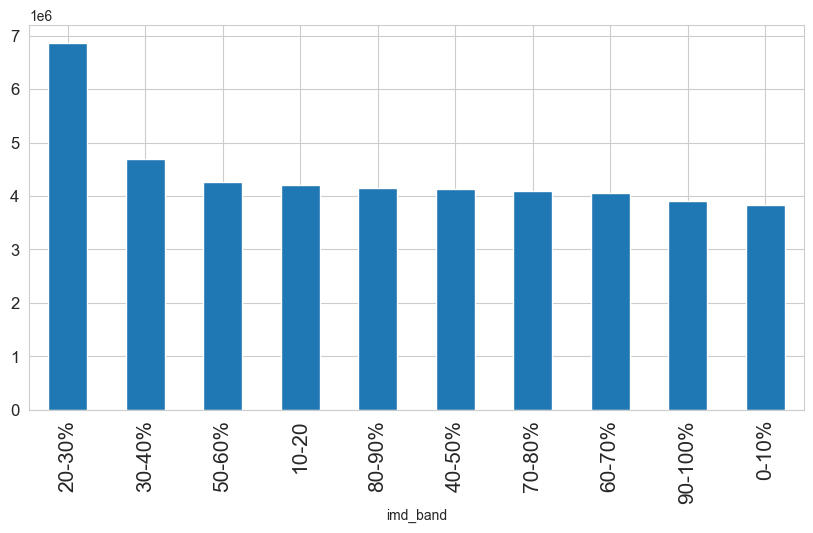

In [297]:
# Number of Clicks by imd_band.

plt.figure(figsize = (10, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['imd_band'])['sum_click'].sum().sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='gender'>

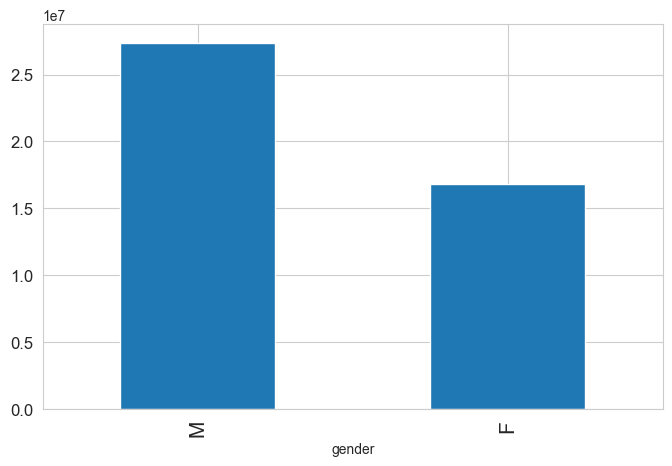

In [298]:
# We can see that Males have higher Click Rate as compared to the females

plt.figure(figsize = (8, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['gender'])['sum_click'].sum().sort_values(ascending = False).plot(kind='bar')

age_band  final_result
0-35      Pass            8469
          Withdrawn       7381
          Fail            5231
35-55     Pass            3800
          Withdrawn       2721
0-35      Distinction     1863
35-55     Fail            1792
          Distinction     1120
55<=      Pass              92
          Withdrawn         54
          Distinction       41
          Fail              29
Name: id_student, dtype: int64
final_result       Distinction       Fail       Pass  Withdrawn
age_band age_band                                              
0-35     0-35         8.119770  22.798989  36.911611  32.169630
35-55    35-55       11.873211  18.997138  40.284109  28.845542
55<=     55<=        18.981481  13.425926  42.592593  25.000000


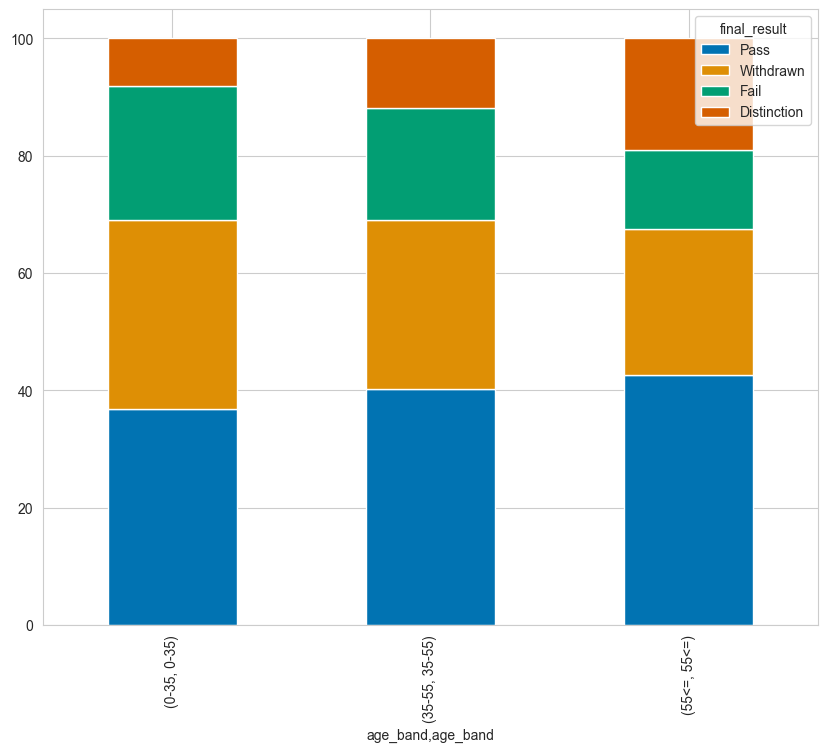

In [299]:
## Following plot shows us the number of students in each result category. Most of the data is in age band 0-55.
## There are very few data points for age >= 55. 
## We can see that Failure and Withdrawn rate is greater in age_band 0-35

print(student_info.groupby(['age_band', 'final_result'])['id_student'].count().sort_values(ascending = False))
stacked_plot(student_info, 'age_band', 'final_result', 'id_student', plot_size=(10, 8))

final_result                                             Distinction  \
highest_education           highest_education                          
A Level or Equivalent       A Level or Equivalent          10.651477   
HE Qualification            HE Qualification               14.735729   
Lower Than A Level          Lower Than A Level              5.525156   
No Formal quals             No Formal quals                 4.610951   
Post Graduate Qualification Post Graduate Qualification    28.115016   

final_result                                                  Fail       Pass  \
highest_education           highest_education                                   
A Level or Equivalent       A Level or Equivalent        19.273763  41.381274   
HE Qualification            HE Qualification             16.701903  41.437632   
Lower Than A Level          Lower Than A Level           26.037392  33.325733   
No Formal quals             No Formal quals              27.377522  25.072046   
Post Grad

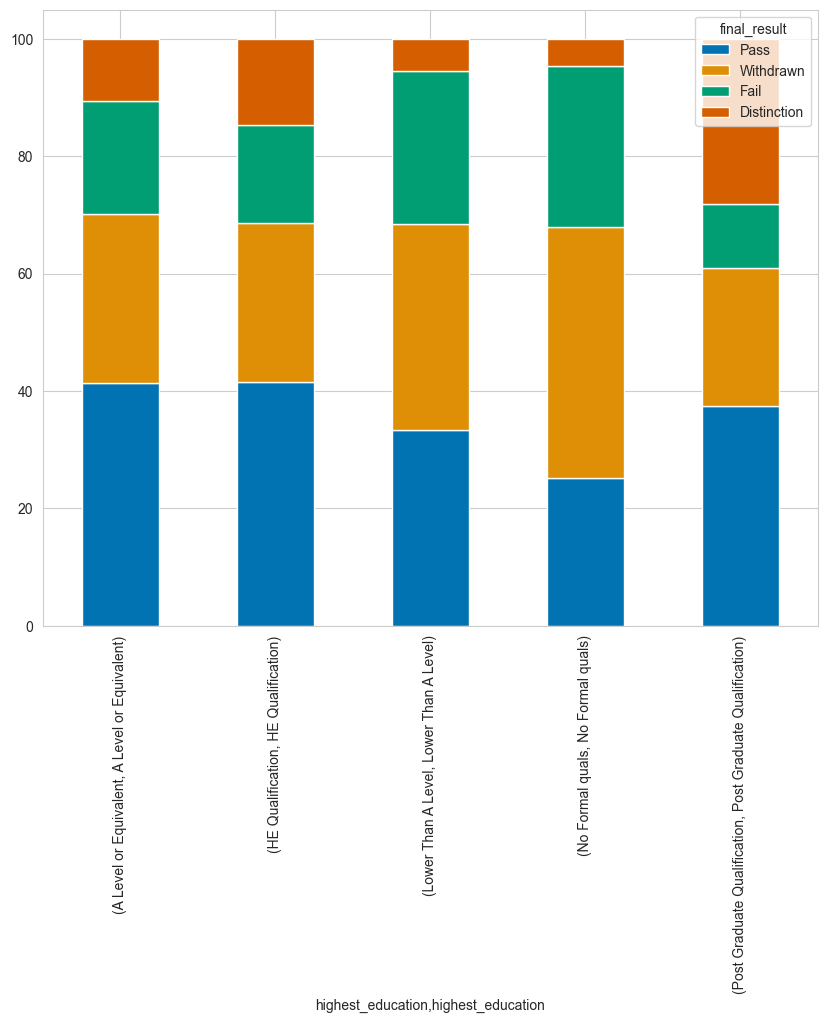

In [300]:
# We can see from the plot that Failure Rate and Withdrawal Rate is high in people who have NO FORMAL EDUCATION
# and who have LOWER THAN A LEVEL EDUCATION
# Failure Rate is lowest in people who has Post Graduation.


stacked_plot(student_info, 'highest_education', 'final_result', 'id_student', plot_size=(10, 8))

<Axes: xlabel='highest_education', ylabel='count'>

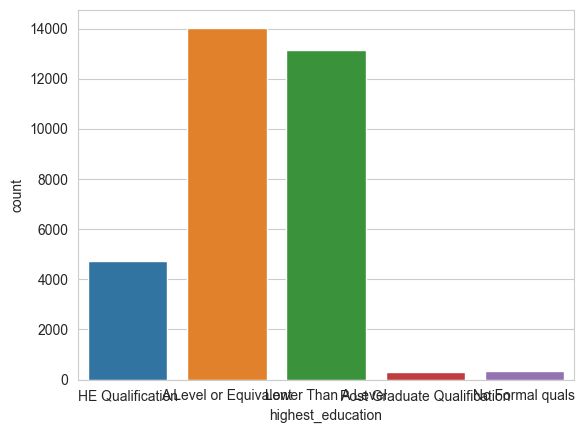

In [301]:
## We can see from the plot that most of the data is for people who have a level or lower level of education.
## This will cause an imbalance when the feature is used in the model. So I will manipulate the feature and 
## create two categories. One with higher education and one with lower education.

sns.countplot( x= 'highest_education' , data = student_info)

In [302]:
student_info['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [303]:
## Manioulating the feature higher_education

student_info['highest_education'] = [0 if education in ['A Level or Equivalent', 'Lower Than A Level', 'No Formal quals']
                                    else 1 for education in student_info['highest_education']]

<Axes: xlabel='highest_education', ylabel='count'>

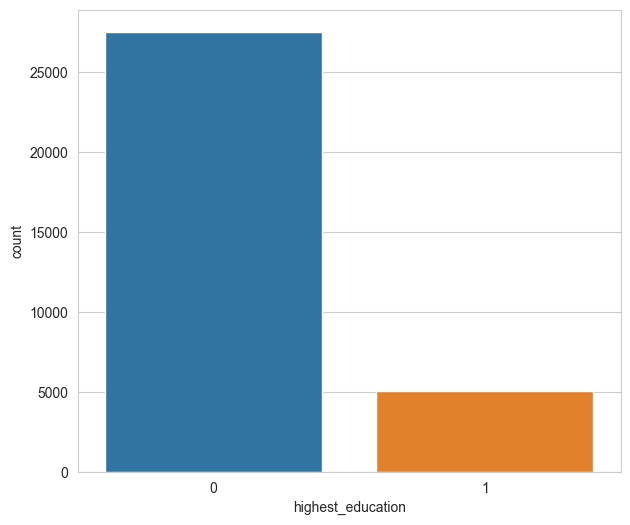

In [304]:
plt.figure(figsize=(7, 6))
sns.countplot(x=  'highest_education', data= student_info)

final_result                         Distinction       Fail       Pass  \
highest_education highest_education                                      
0                 0                     8.127042  22.606171  37.328494   
1                 1                    15.566131  16.339480  41.185802   

final_result                         Withdrawn  
highest_education highest_education             
0                 0                  31.938294  
1                 1                  26.908586  


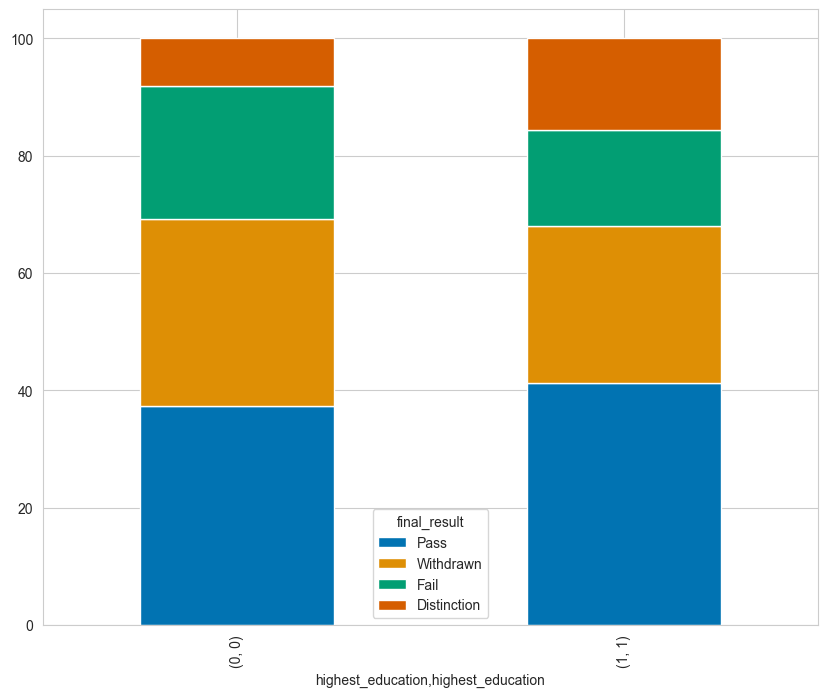

In [305]:
## We can see from the plot that students with lower education has higher failure rate than the ones who had higher education

stacked_plot(student_info, 'highest_education', 'final_result', 'id_student', plot_size=(10, 8))

final_result                               Distinction       Fail       Pass  \
region               region                                                    
East Anglian Region  East Anglian Region      9.790419  20.898204  39.191617   
East Midlands Region East Midlands Region     8.456660  19.534884  37.251586   
Ireland              Ireland                  8.277027  22.043919  46.621622   
London Region        London Region            8.177861  23.134328  34.172886   
North Region         North Region            12.616566  17.937466  37.904553   
North Western Region North Western Region     7.329663  24.225740  32.863042   
Scotland             Scotland                 9.518282  24.724318  39.437028   
South East Region    South East Region       11.558503  17.764093  39.933681   
South Region         South Region            10.769728  17.593790  41.623545   
South West Region    South West Region       10.837438  19.088670  38.957307   
Wales                Wales              

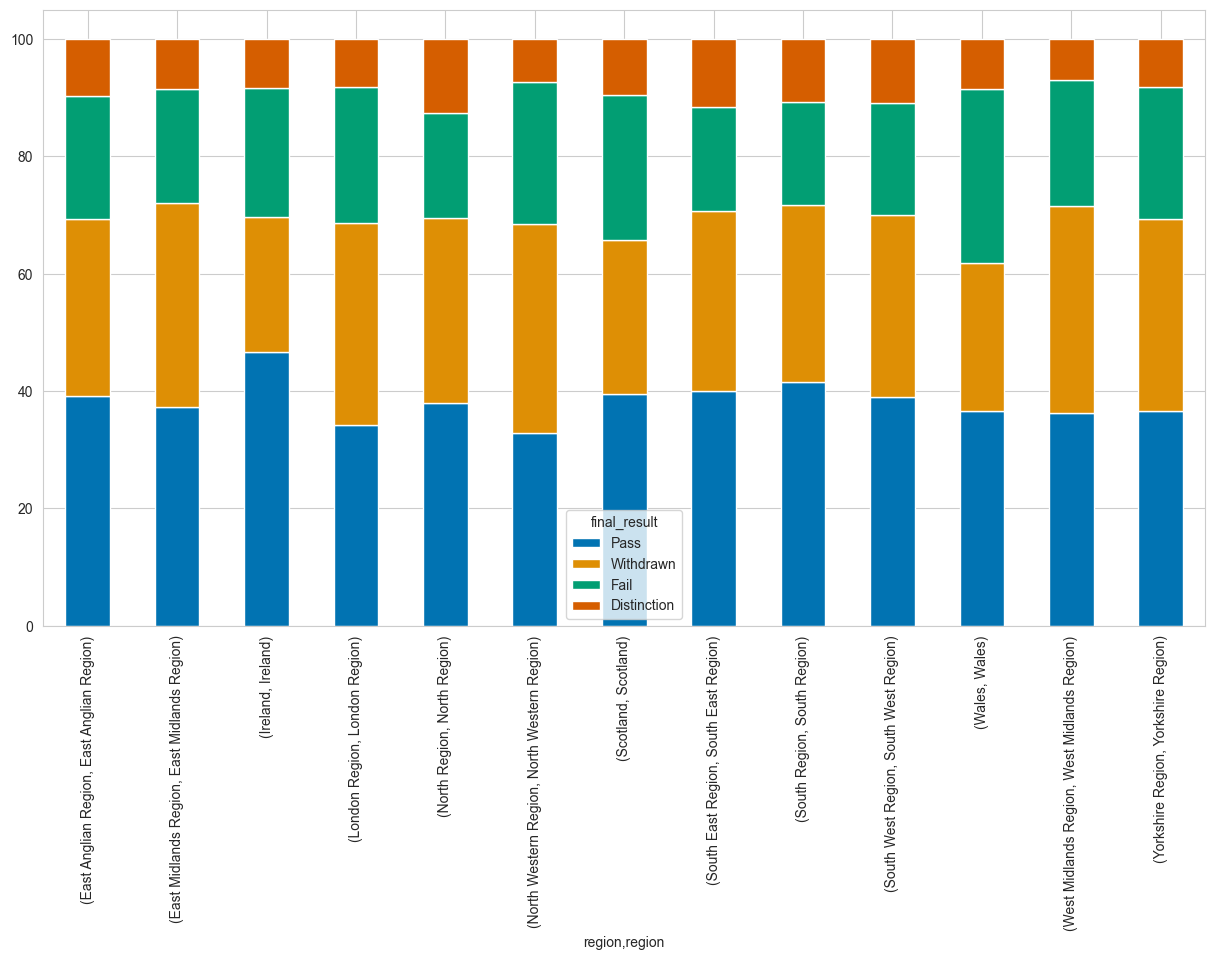

In [306]:
## We can see that Failure Rate and Withdrawal rate is similar in all the regions.

stacked_plot(student_info, 'region', 'final_result', 'id_student', plot_size=(15, 8))

final_result       Distinction       Fail       Pass  Withdrawn
imd_band imd_band                                              
0-10%    0-10%        5.073996  27.665358  30.081546  37.179100
10-20    10-20        5.432309  25.938567  33.191126  35.437998
20-30%   20-30%       9.695698  20.755509  36.873033  32.675761
30-40%   30-40%       8.900819  22.153151  38.005086  30.940944
40-50%   40-50%       8.998771  21.406634  37.592138  32.002457
50-60%   50-60%       9.507042  22.439181  39.276569  28.777209
60-70%   60-70%      10.292599  18.519793  41.617900  29.569707
70-80%   70-80%      10.871830  20.805835  40.639111  27.683223
80-90%   80-90%      11.875453  17.921796  42.179580  28.023172
90-100%  90-100%     14.116719  16.600946  43.414826  25.867508


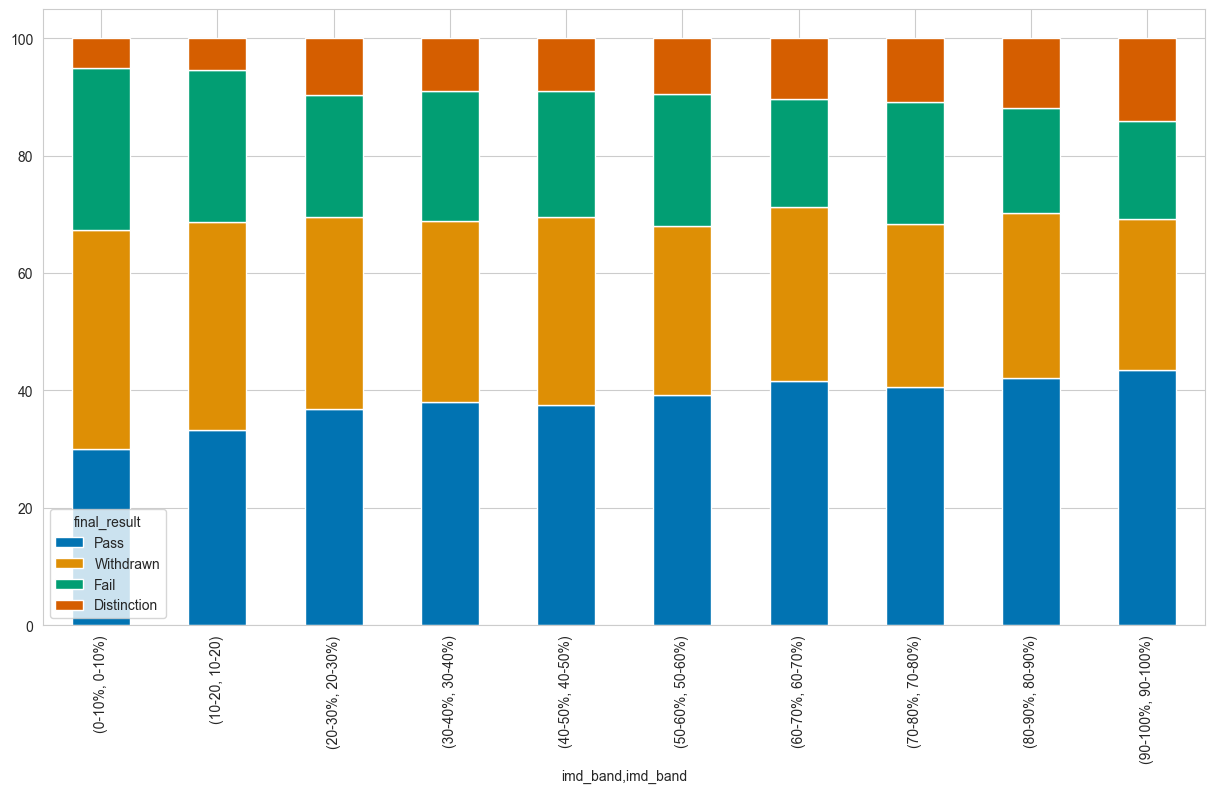

In [307]:
stacked_plot(student_info, 'imd_band', 'final_result', 'id_student', plot_size=(15, 8))

<Axes: xlabel='gender', ylabel='count'>

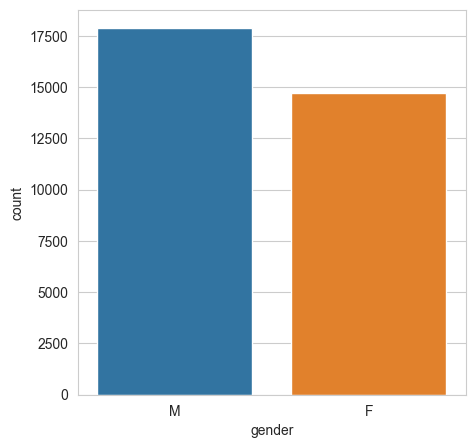

In [308]:
# We can see that Males are more in number as compared to females

plt.figure(figsize=(5, 5))
sns.countplot(x=  'gender', data= student_info)

final_result   Distinction       Fail       Pass  Withdrawn
gender gender                                              
F      F          9.471396  21.083028  38.965892  30.479685
M      M          9.118881  22.092308  37.068531  31.720280


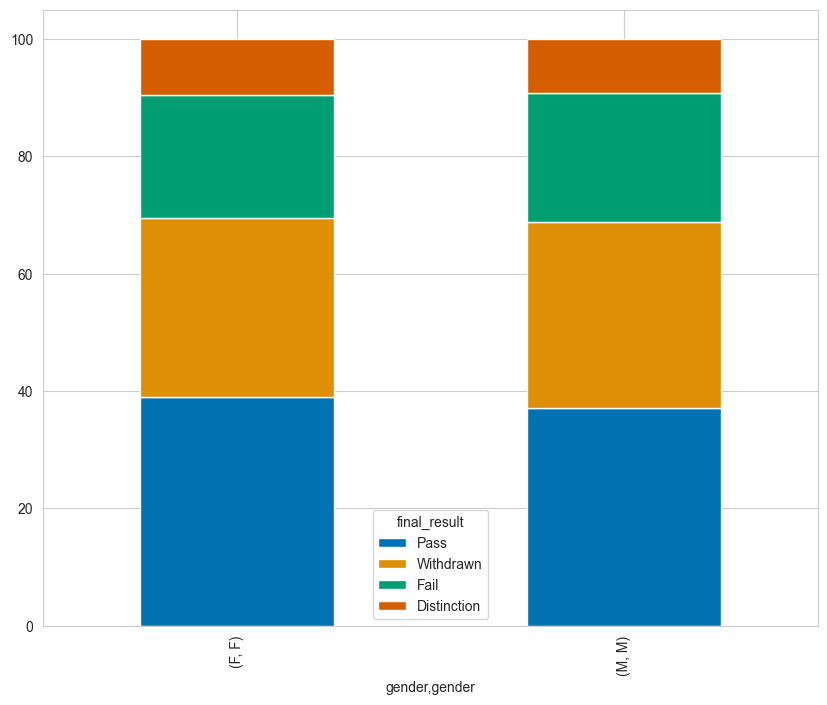

In [309]:
## We can see that there is no difference between the Withdrawal Rates and Failure Rates for both the gender.

stacked_plot(student_info, 'gender', 'final_result', 'id_student', plot_size=(10, 8))

final_result           Distinction       Fail       Pass  Withdrawn
disability disability                                              
N          N              9.517823  21.543376  38.659146  30.279656
Y          Y              7.048040  22.503161  31.099874  39.348925


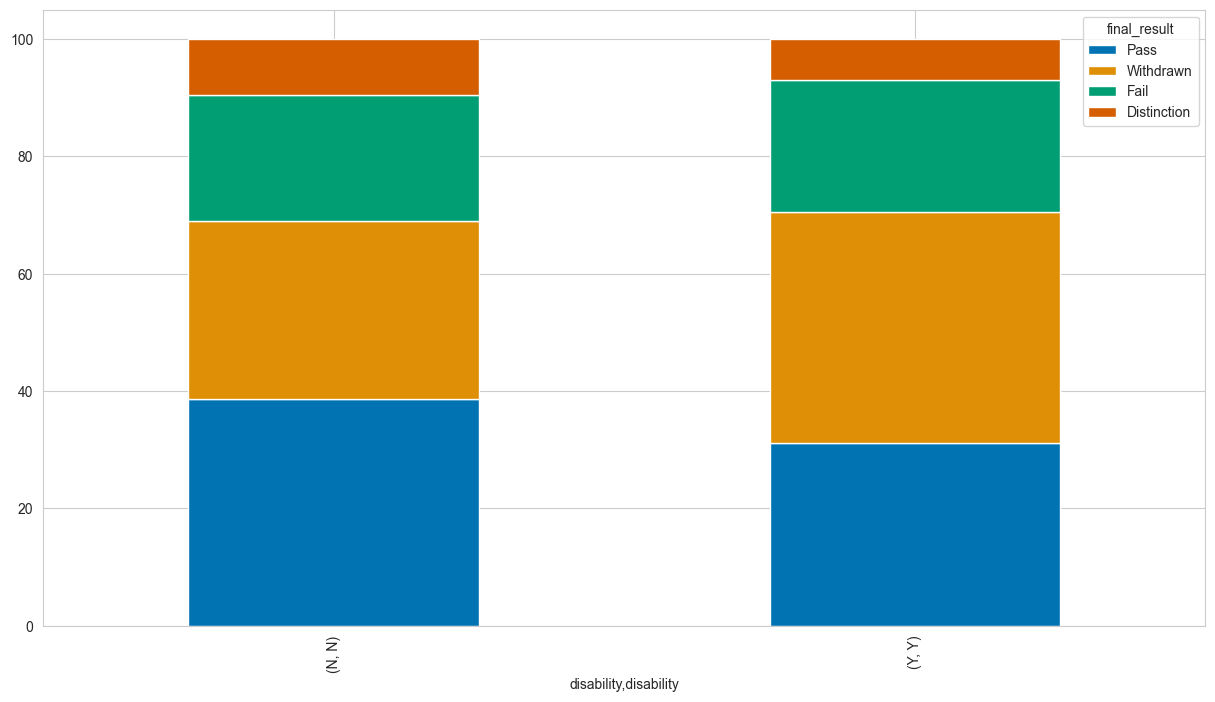

In [310]:
# Following plot shows us the results by disability.
# Withdrawn Rate is more in People who are disable.


stacked_plot(student_info, 'disability', 'final_result', 'id_student', plot_size=(15, 8))

##### Combining Student Info with the Student Registration Table

In [311]:
student_registration_merge_courses = student_registration_merge_courses.drop('date_unregistration', axis = 1)

In [312]:
student_info = student_info.merge(student_registration_merge_courses,
                                 on = ['code_module', 'code_presentation', 'id_student'],
                                 how = 'left')

final_result                   Distinction       Fail       Pass  Withdrawn
Starting_Month Starting_Month                                              
February       February           8.896541  24.615631  34.769379  31.718450
October        October            9.515046  19.786123  39.885601  30.813231


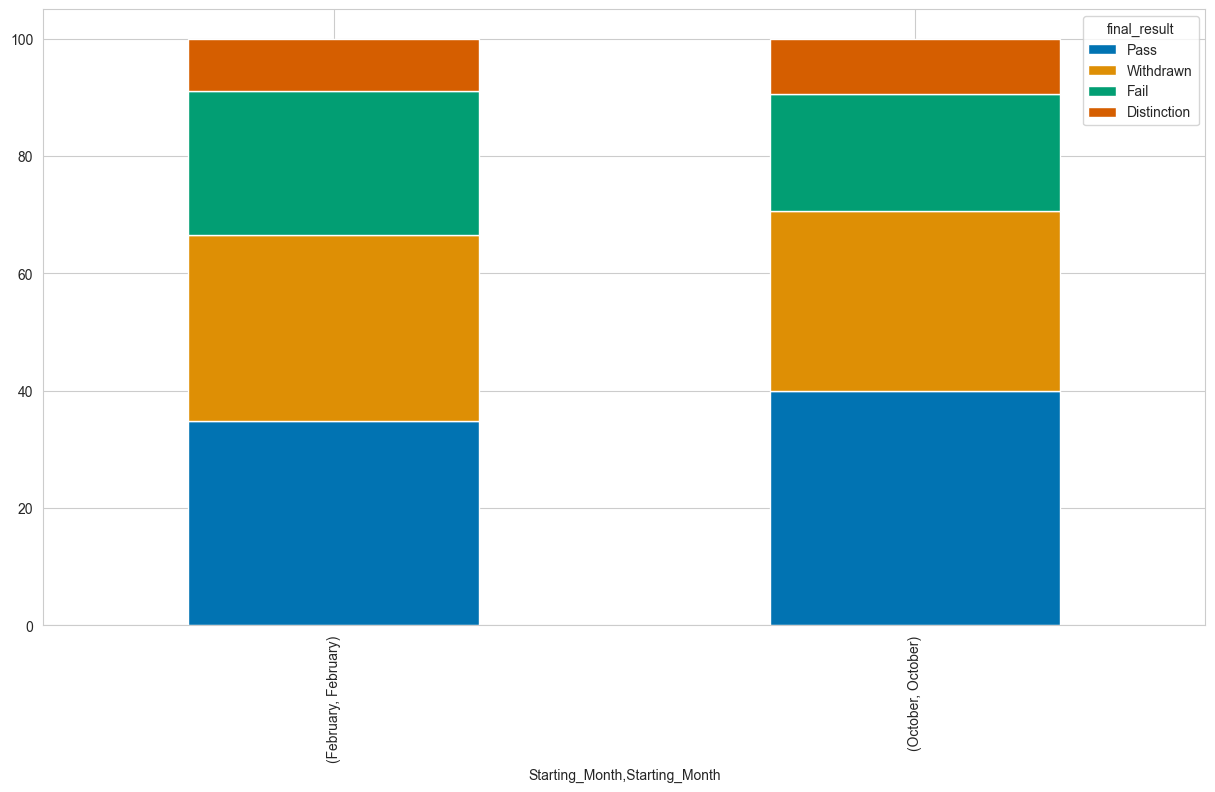

In [313]:
## Following Plot shows us the Result by Session. Failure Rate is more in people who took the course in February.
## Also withdrawn rate is slightly more in course starting in February. 

stacked_plot(student_info, 'Starting_Month', 'final_result', 'id_student', plot_size=(15, 8))

<Axes: xlabel='Starting_Month', ylabel='count'>

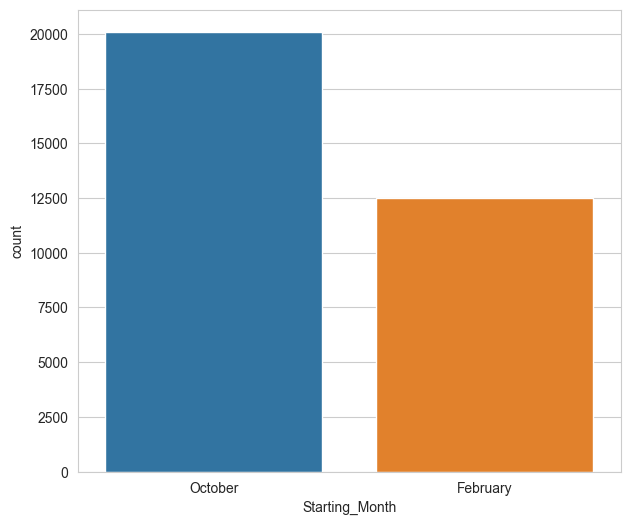

In [314]:
## There are less people who registered in February as compared to October. But still the failure and withdrawn rate
## is more for february. May be the students don't like content or the course in February.
plt.figure(figsize=(7, 6))
sns.countplot(x='Starting_Month', data=student_info )

final_result                               Distinction       Fail       Pass  \
num_of_prev_attempts num_of_prev_attempts                                      
0                    0                       10.052426  20.164667  39.224517   
1                    1                        4.334647  30.585026  30.221279   
2                    2                        3.259259  34.962963  25.185185   
3                    3                        0.704225  40.140845  21.830986   
4                    4                        0.000000  30.769231  33.333333   
5                    5                        0.000000  46.153846  15.384615   
6                    6                       25.000000  25.000000   0.000000   

final_result                               Withdrawn  
num_of_prev_attempts num_of_prev_attempts             
0                    0                     30.558390  
1                    1                     34.859048  
2                    2                     36.592593  
3   

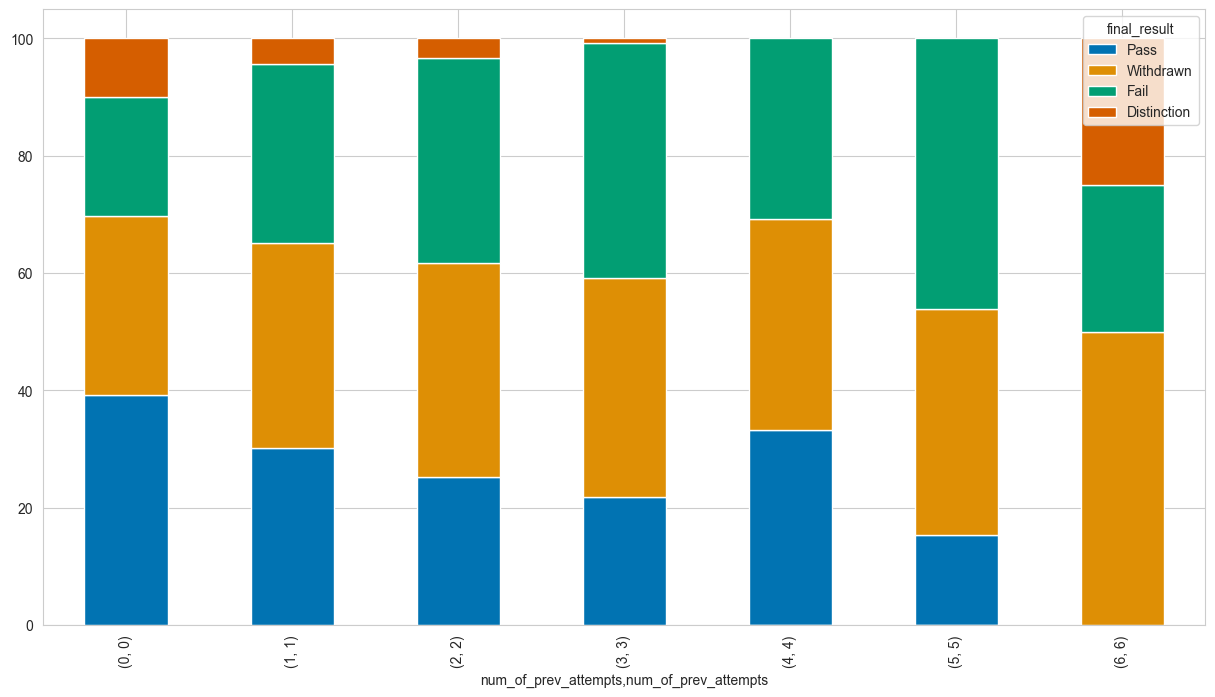

In [315]:
## We can clearly see from the plot that we have the least failure and withdrawn rate in the students who did not
## took the course before or number of previous attempts are zero. 

stacked_plot(student_info, 'num_of_prev_attempts', 'final_result', 'id_student', plot_size=(15, 8))

<Axes: xlabel='num_of_prev_attempts', ylabel='count'>

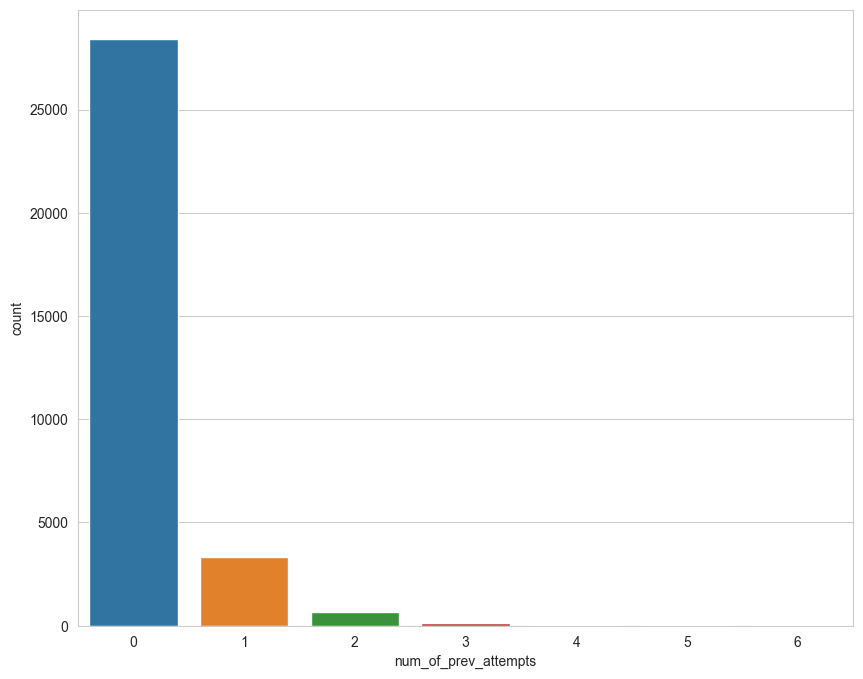

In [316]:
# Most of the data is for zero attempts which cause imbalance in the feature. We need to collect more data for creating
# balance in the feature. So instead of using this feature, we will manipulate the feature to create two categories only.
# 0 and 1 where 0 show no previous attempts and 1 shows previous attempts.

plt.figure(figsize=(10, 8))
sns.countplot(x= 'num_of_prev_attempts', data= student_info )

In [317]:
student_info['num_of_prev_attempts'] = [0 if attempts == 0 else 1 for attempts in student_info['num_of_prev_attempts']]

<Axes: xlabel='num_of_prev_attempts', ylabel='count'>

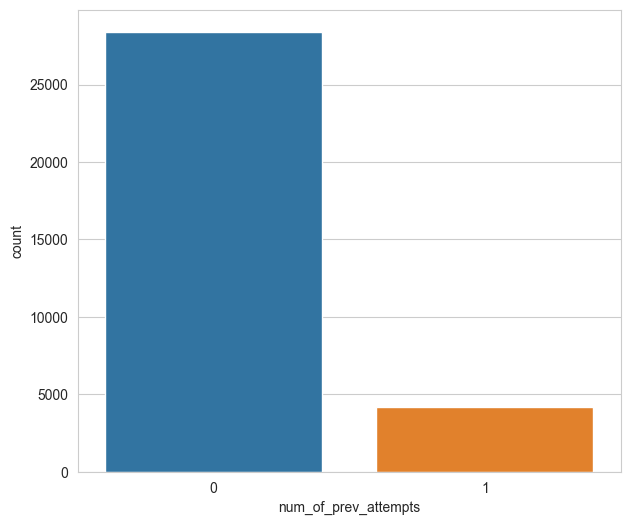

In [318]:
## Still there is imbalance in the feature but it's better than the initial.

plt.figure(figsize=(7, 6))
sns.countplot(x='num_of_prev_attempts', data= student_info, )

final_result                               Distinction       Fail       Pass  \
num_of_prev_attempts num_of_prev_attempts                                      
0                    0                       10.052426  20.164667  39.224517   
1                    1                        4.002876  31.663471  29.074784   

final_result                               Withdrawn  
num_of_prev_attempts num_of_prev_attempts             
0                    0                     30.558390  
1                    1                     35.258869  


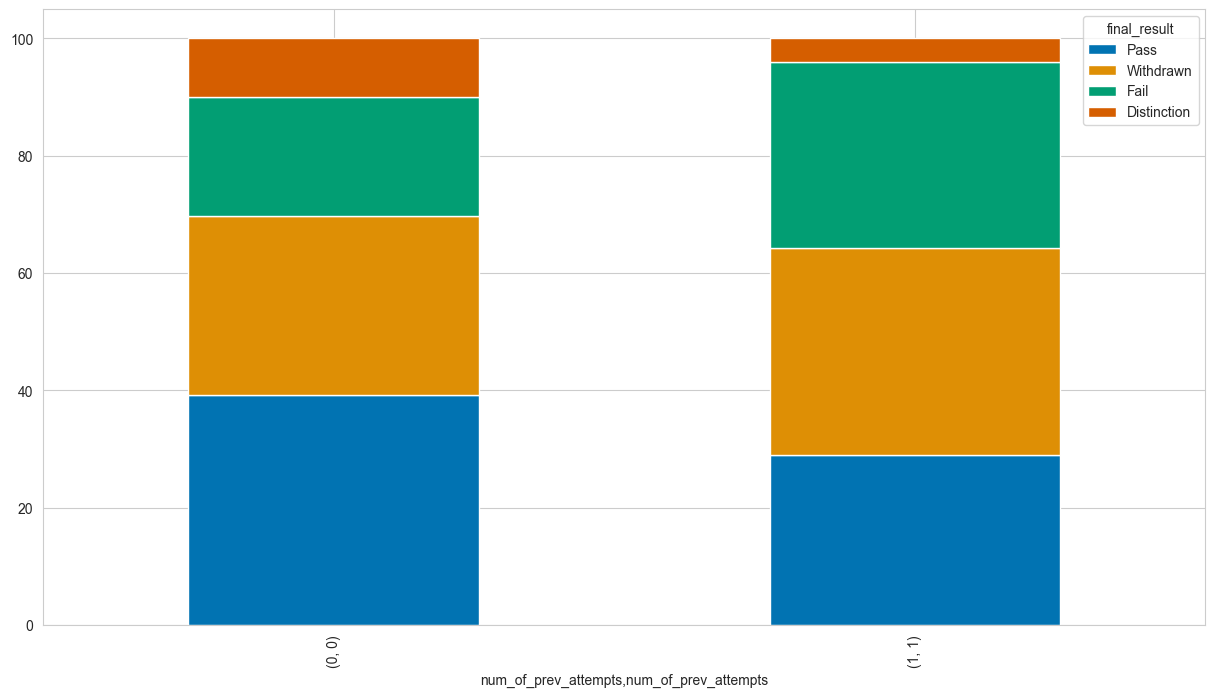

In [319]:
# We can clearly see that people with previous attempts have more failure and withdrawn rate.

stacked_plot(student_info, 'num_of_prev_attempts', 'final_result', 'id_student', plot_size=(15, 8))

final_result             Distinction       Fail       Pass  Withdrawn
code_module code_module                                              
AAA         AAA             5.882353  12.165775  65.106952  16.844920
BBB         BBB             8.559869  22.341636  38.905045  30.193450
CCC         CCC            11.231394  17.613893  26.612539  44.542174
DDD         DDD             6.106505  22.512755  35.507015  35.873724
EEE         EEE            12.133606  19.154738  44.103613  24.608044
FFF         FFF             8.631796  22.043288  38.366400  30.958516
GGG         GGG            15.627466  28.729282  44.119968  11.523283


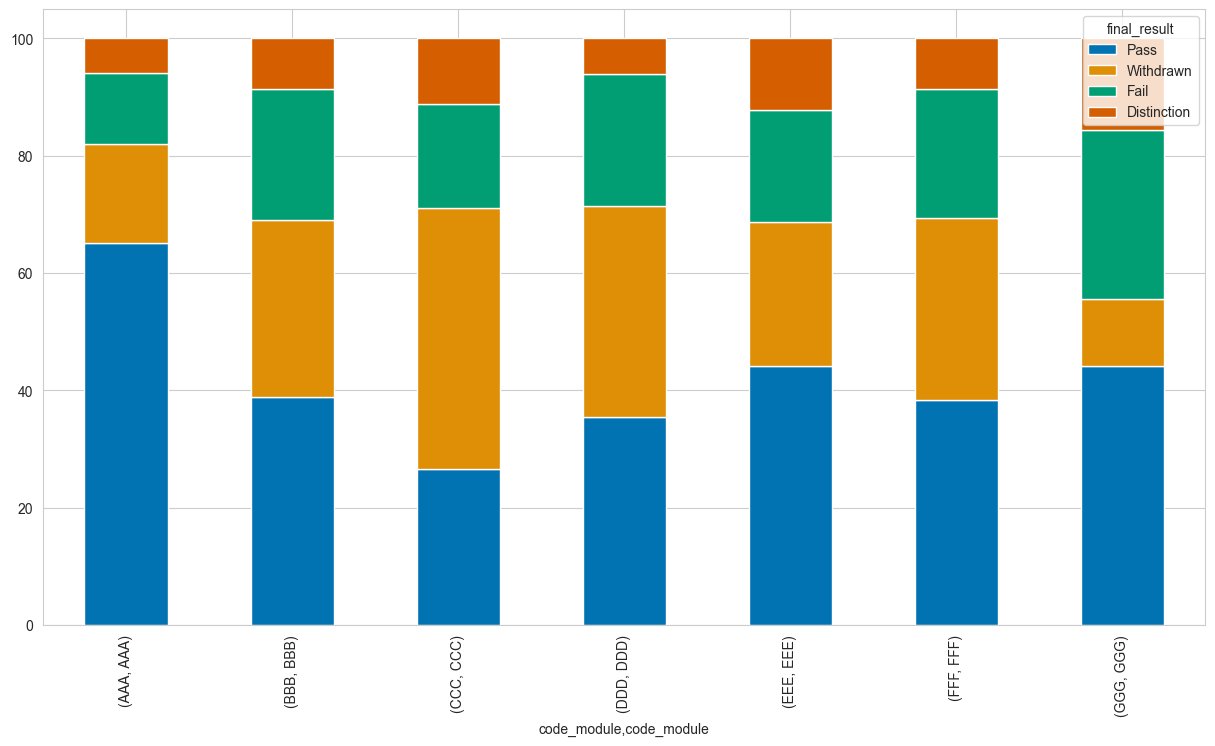

In [320]:
## We can see that 

stacked_plot(student_info, 'code_module', 'final_result', 'id_student', plot_size=(15, 8))

In [321]:
student_info['Code_Category'] = ['Social_Science' if student_info['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                 else 'STEM' for i in range(len(student_info))]

final_result                   Distinction       Fail       Pass  Withdrawn
Code_Category  Code_Category                                               
STEM           STEM               8.910382  20.867209  35.879824  34.342585
Social_Science Social_Science     9.981235  23.107855  41.837191  25.073720


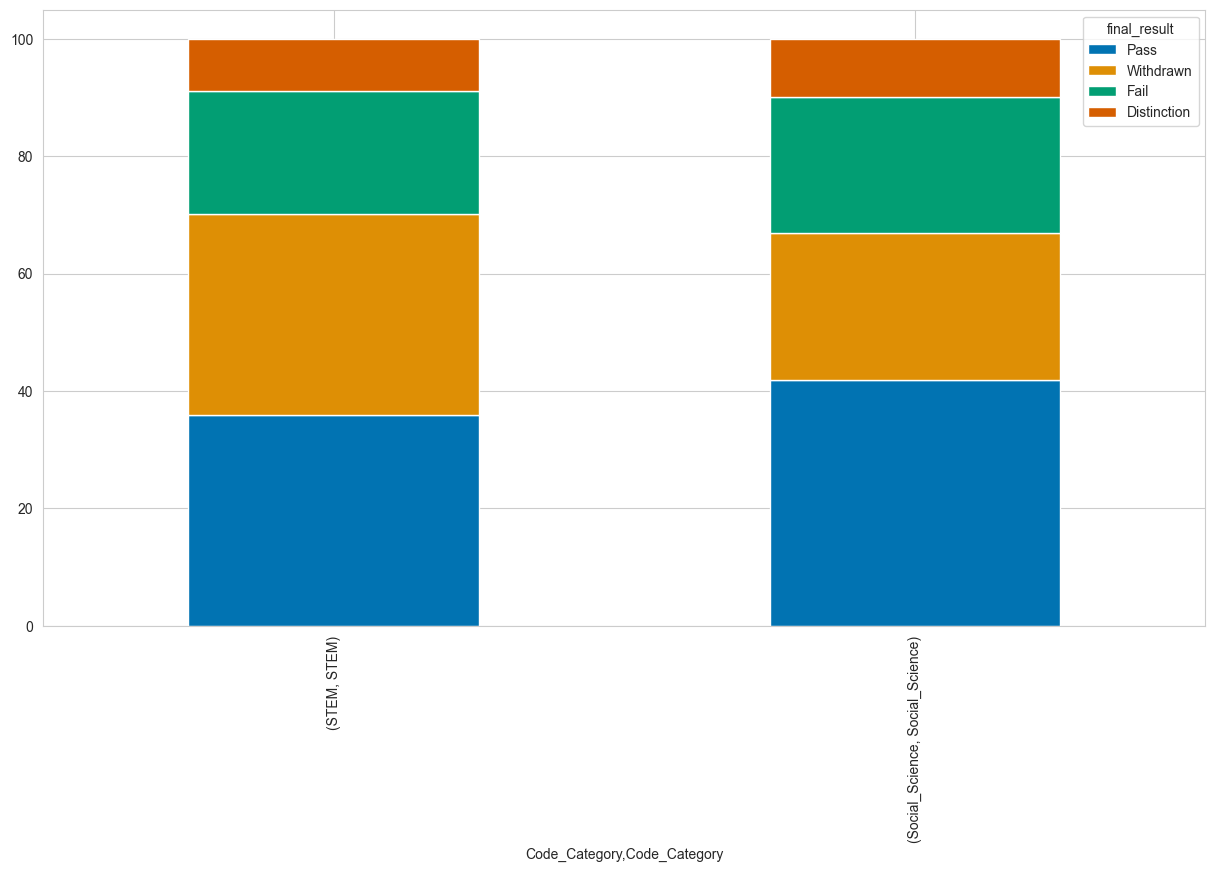

In [322]:
## From the following plot we can see that Failure Rate is higher in Social Science and Withdrawn rate is higher in
## STEM Courses.

stacked_plot(student_info, 'Code_Category', 'final_result', 'id_student', plot_size=(15, 8))